# Inspecting and monitoring deep-learning models using Keras callbacks and TensorBoard

## Using callbacks to act on a model during training

### ModelCheckpoint and EarlyStopping callbacks

In [ ]:
import keras

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='acc',
        patience=1,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='my_model.h5',
        monitor='val_loss',
        save_best_only=True,
    )
]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# callback will monitor validation loss and accuracy, so validation_data should be passed
model.fit(x, y,
          epochs=10,
          batch_size=32,
          callbacks=callbacks_list,
          validation_data=(x_val, y_val))

### The ReduceLROnPlateau callback

In [ ]:
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=10,
    )
]

### Writing your own callback

In [ ]:
import keras
import numpy as np

calss ActivationLogger(keras.callbacks.Callback):
    def set_model(self, model):
        self.model = model
        layers_outputs = [layer.output for layer in model.layers]
        self.activations_model = keras.models.Model(model.input, layers_outputs)
    
    def on_epoch_end(self, epoch, logs=None):
        if self.validation_data is None:
            raise RuntimeError('Requires validation_data.')
        validation_sample = self.validation_data[0][0:1]
        activations = self.activations_model.predict(validation_sample)
        f = open('activations_at_epoch_' + str(epoch) + '.npz', 'w')
        np.savez(f, activations)
        f.close()

## TensorBoard: the TensorFlow visualization framework

In [1]:
# Text-classification model to use with TensorBoard
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
                           input_length=max_len,
                           name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
__________________________________________________

In [2]:
# Training the model with a TensorBoard callback
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='my_log_dir',
        histogram_freq=1,
        embeddings_freq=1,
    )
]

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/20
157/157 [==============================] - 10s 65ms/step - loss: 0.5260 - acc: 0.7218 - val_loss: 0.5287 - val_acc: 0.7498
Epoch 2/20
157/157 [==============================] - 10s 63ms/step - loss: 0.3300 - acc: 0.8584 - val_loss: 0.3288 - val_acc: 0.8612
Epoch 3/20
157/157 [==============================] - 10s 67ms/step - loss: 0.2841 - acc: 0.8818 - val_loss: 0.3352 - val_acc: 0.8586
Epoch 4/20
157/157 [==============================] - 11s 67ms/step - loss: 0.2490 - acc: 0.9016 - val_loss: 0.3400 - val_acc: 0.8562
Epoch 5/20
157/157 [==============================] - 11s 68ms/step - loss: 0.2167 - acc: 0.9172 - val_loss: 0.4846 - val_acc: 0.8126
Epoch 6/20
157/157 [==============================] - 10s 66ms/step - loss: 0.1882 - acc: 0.9294 - val_loss: 0.3682 - val_acc: 0.8542
Epoch 7/20
157/157 [==============================] - 11s 70ms/step - loss: 0.1549 - acc: 0.9458 - val_loss: 0.3599 - val_acc: 0.8638
Epoch 8/20
157/157 [==============================] - 11s 67ms

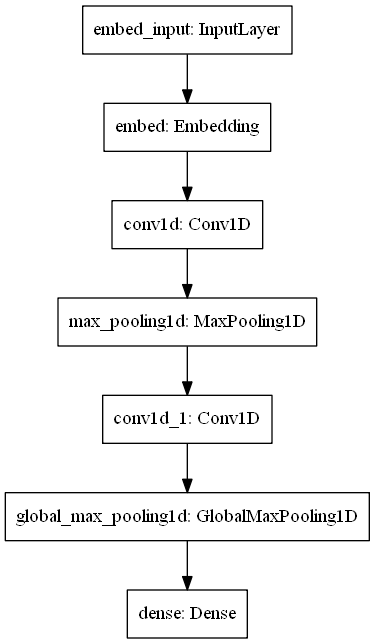

In [2]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

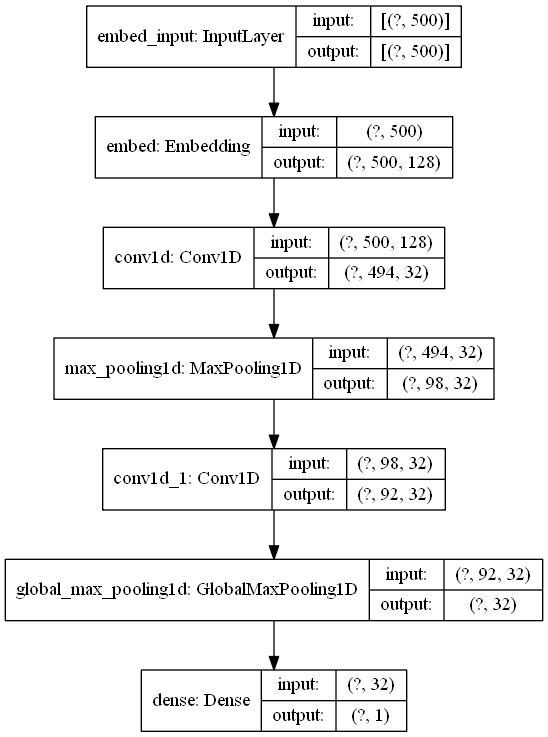

In [3]:
# with shape information
plot_model(model, show_shapes=True, to_file='model.png')